#  Ideas for fitting code:

- pickle all FF objects

In [1]:
%load_ext autoreload
%autoreload 2

from ff_energy.cli import load_config_maker, load_all_theory, charmm_jobs
# from ff_energy.structure import
from ff_energy.potential import FF, LJ
import numpy as np
from ff_energy.data import Data, plot_ecol, plot_intE
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd 
from ff_energy.utils import *
from ff_energy.data import Data

sig_bound = (0.5, 4.0)
ep_bound = (0.00001, 1.0)
LJ_bound = [(sig_bound), (sig_bound), (ep_bound), (ep_bound)]


atom_key_pairs [('CG331', 'CG331'), ('CG331', 'HGA3'), ('CG331', 'HGP1'), ('CG331', 'HT'), ('CG331', 'OG311'), ('CG331', 'OT'), ('HGA3', 'HGA3'), ('HGA3', 'HGP1'), ('HGA3', 'HT'), ('HGA3', 'OG311'), ('HGA3', 'OT'), ('HGP1', 'HGP1'), ('HGP1', 'HT'), ('HGP1', 'OG311'), ('HGP1', 'OT'), ('HT', 'HT'), ('HT', 'OG311'), ('HT', 'OT'), ('OG311', 'OG311'), ('OG311', 'OT'), ('OT', 'OT')]
0 ('CG331', 'CG331')
1 ('CG331', 'HGA3')
2 ('CG331', 'HGP1')
3 ('CG331', 'HT')
4 ('CG331', 'OG311')
5 ('CG331', 'OT')
6 ('HGA3', 'HGA3')
7 ('HGA3', 'HGP1')
8 ('HGA3', 'HT')
9 ('HGA3', 'OG311')
10 ('HGA3', 'OT')
11 ('HGP1', 'HGP1')
12 ('HGP1', 'HT')
13 ('HGP1', 'OG311')
14 ('HGP1', 'OT')
15 ('HT', 'HT')
16 ('HT', 'OG311')
17 ('HT', 'OT')
18 ('OG311', 'OG311')
19 ('OG311', 'OT')
20 ('OT', 'OT')


In [39]:


FUNC = LJ
BOUNDS = LJ_bound
ff_name = "pbe0dz_pc"
structure = "water_dimer"
pk = "pickles/water_dimer/pbe0_dz.pc"

#########################################################

ff_pkls = Path("pickles/ff")
ff_pickles = ff_pkls.glob("*.pkl")
ff_pickles = [_.name for _ in ff_pickles]
struct_dist_pkls = Path("pickles/structures")
struct_dist_pickles = struct_dist_pkls.glob("*.pkl")
struct_dist_pickles = [_.name for _ in struct_dist_pickles]


pickled_ff = (ff_pkls/f"{ff_name}.pkl").exists()
pickled_dists = (struct_dist_pkls/f"{structure}.pkl").exists()


if pickled_ff:
    print("Pickled FF exists!, loading: ", ff_pkls/f"{ff_name}.pkl")
    try:
        ff = next(read_from_pickle(ff_pkls / f"{ff_name}"))
    except Exception as e:
        print(e)
        picked_ff = False
if not picked_ff:
    if pickled_dists:
        print("loading pickled distances/structure")
        try:
            structures, dists =  next(read_from_pickle(
                f"structures/{structure}"))
        except Exception as e:
            print(e)
            pickled_dists = False
    if not pickled_dists:
        print("No pickled distances/structure information, calculating:")
        theory, elec = ff_name.split("_")
        
        CMS = load_config_maker(theory, structure, elec)
        
        jobs = charmm_jobs(CMS)
        
        dists = {_.name.split(".")[0]: _.distances 
                 for _ in jobs[0].structures}
        
        # print(dists.keys())
        
        structures = [_ for _ in jobs[0].structures]
        pickle_output((structures, dists), 
                      name=f"structures/{structure}.pkl")

    s = structures[0]
    data_ = Data(pk)
    ff = FF(data_.data,dists,FUNC,BOUNDS,s)
    print(ff)

# d = ff.data_save.sample(200)
# ff.data = d.copy()
args = [1.7682,0.2245,-0.1521,-0.0460]


Pickled FF exists!, loading:  pickles/ff/pbe0dz_pc.pkl
[Errno 2] No such file or directory: 'pickles/ff/pbe0dz_pc'
loading pickled distances/structure
[Errno 2] No such file or directory: 'structures/water_dimer'
No pickled distances/structure information, calculating:
pc
Strcuture,PDB already already exists, loading structure from pickle
[('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]
0 ('HT', 'HT') ('HT', 'HT')
1 ('HT', 'OT') ('HT', 'OT')
2 ('OT', 'OT') ('OT', 'OT')
FF: LJ


In [42]:
print(len(ff.dists["1-2"][15]))
print(len(ff.dists["1-2"][17]))
print(len(ff.dists["1-2"][20]))
# ff.eval_func(args)
# dists.keys()
# # dists["test467"]
# # ff.atom_type_pairs
ff.data

1
2
1


,TOTAL,ELEC,VDW,KEY,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE
8-5,None,None,None,8-5,-152.714146,-152.079453,398.271831,NaN,NaN
11-1,None,None,None,11-1,-152.714178,-152.078193,399.082709,NaN,NaN
20-2,None,None,None,20-2,-152.714157,-152.075904,400.505497,NaN,NaN
10-1,None,None,None,10-1,-152.714178,-152.078847,398.672378,NaN,NaN
1-3,None,None,None,1-3,-152.714157,-151.699480,636.712937,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9-5,None,None,None,9-5,-152.714175,-152.078697,398.764163,NaN,NaN
13-4,None,None,None,13-4,-152.714172,-152.076306,400.263193,NaN,NaN
8-1,None,None,None,8-1,-152.714178,-152.080659,397.535199,NaN,NaN
22-1,None,None,None,22-1,-152.714178,-152.075932,400.501324,NaN,NaN


In [44]:
for i in range(1):
    # d = ff.data_save.sample(100)
    # ff.data = d.copy()
    print(len(ff.data))
    _ = ff.eval_func(args)
    _ = ff.LJ_performace(_)
    # print(_.keys())
    # print(len(_.keys()))
    # _["nb_intE"] = _["NBONDS"]
    # plot_intE(_)
    print(_["SE"].mean())
_

104
nan


,TOTAL,ELEC,VDW,KEY,M_ENERGY,C_ENERGY,intE,NBONDS,nb_intE,LJ,VDW_ERROR,VDW_SE,SE
8-5,None,None,None,8-5,-152.714146,-152.079453,398.271831,NaN,NaN,-0.166099,NaN,NaN,NaN
11-1,None,None,None,11-1,-152.714178,-152.078193,399.082709,NaN,NaN,-0.098676,NaN,NaN,NaN
20-2,None,None,None,20-2,-152.714157,-152.075904,400.505497,NaN,NaN,-0.009461,NaN,NaN,NaN
10-1,None,None,None,10-1,-152.714178,-152.078847,398.672378,NaN,NaN,-0.131783,NaN,NaN,NaN
1-3,None,None,None,1-3,-152.714157,-151.699480,636.712937,NaN,NaN,11468.045582,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-5,None,None,None,9-5,-152.714175,-152.078697,398.764163,NaN,NaN,-0.180145,NaN,NaN,NaN
13-4,None,None,None,13-4,-152.714172,-152.076306,400.263193,NaN,NaN,-0.036114,NaN,NaN,NaN
8-1,None,None,None,8-1,-152.714178,-152.080659,397.535199,NaN,NaN,-0.195343,NaN,NaN,NaN
22-1,None,None,None,22-1,-152.714178,-152.075932,400.501324,NaN,NaN,-0.005558,NaN,NaN,NaN


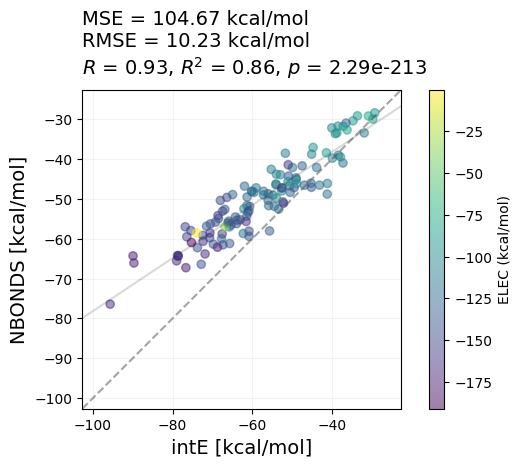

In [7]:
plot_intE(_)

In [27]:
for i in range(10):
    d = ff.data_save.sample(100)
    ff.data = d.copy()
    ff.fit_repeat(10, bounds=LJ_bound)
pickle_output(ff, "ff/pbe0dz_pc")

Optimizing LJ parameters...
function: LJ
bounds: [(0.5, 4.0), (0.5, 4.0), (1e-05, 1.0), (1e-05, 1.0)]
maxfev: 10000
initial guess: [3.8251935050584724, 1.5591357045142964, 0.8697743139446733, 0.6126519050532339]
final_loss_fn:  135.70759775543286
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 135.70759775543286
             x: [ 5.000e-01  5.000e-01  1.000e+00  1.000e-05]
           nit: 37
          nfev: 60
 final_simplex: (array([[ 5.000e-01,  5.000e-01,  1.000e+00,  1.000e-05],
                       [ 5.000e-01,  5.000e-01,  1.000e+00,  1.000e-05],
                       ...,
                       [ 5.000e-01,  5.000e-01,  1.000e+00,  1.000e-05],
                       [ 5.000e-01,  5.000e-01,  1.000e+00,  1.000e-05]]), array([ 1.357e+02,  1.357e+02,  1.357e+02,  1.357e+02,
                        1.357e+02]))
Set optimized parameters to FF object, self.df["LJ"] is updated.
Optimizing LJ parameters...
function: LJ
boun

PicklingError: Can't pickle <function LJ at 0x7f62da942040>: it's not the same object as ff_energy.potential.LJ

In [43]:
# ff.get_best_loss()

In [5]:
print(len(ff.data))
# plot_intE(ff.get_best_df())

500


In [10]:
results = pd.DataFrame(ff.opt_results)
best_func = results.sort_values("fun")[:10]
best_func

,fun,nit,nfev,status,success,message,x,final_simplex
28,25.070408,732,1206,0,True,Optimization terminated successfully.,"[1.682968256617571, 0.5, 0.21080229170948558, ...","([[1.682968256617571, 0.5, 0.21080229170948558..."
29,25.070408,175,307,0,True,Optimization terminated successfully.,"[1.682968338945654, 0.5, 0.21080170329903886, ...","([[1.682968338945654, 0.5, 0.21080170329903886..."
24,25.102769,170,301,0,True,Optimization terminated successfully.,"[1.6812864834257315, 0.5, 0.23267502807348636,...","([[1.6812864834257315, 0.5, 0.2326750280734863..."
20,26.344968,710,1187,0,True,Optimization terminated successfully.,"[1.353712076575799, 1.1780333186709466, 0.0048...","([[1.353712076575799, 1.1780333186709466, 0.00..."
19,26.748546,290,498,0,True,Optimization terminated successfully.,"[1.6717143514553965, 0.5, 0.3073668092657198, ...","([[1.6717143514553965, 0.5, 0.3073668092657198..."
12,26.748546,303,522,0,True,Optimization terminated successfully.,"[1.6717144119809983, 0.5, 0.307366042541767, 0...","([[1.6717144119809983, 0.5, 0.307366042541767,..."
14,26.748546,413,696,0,True,Optimization terminated successfully.,"[1.6717143816909292, 0.5, 0.30736628159376395,...","([[1.6717143816909292, 0.5, 0.3073662815937639..."
17,26.748546,375,649,0,True,Optimization terminated successfully.,"[1.671714431869289, 0.5, 0.30736640106874896, ...","([[1.671714431869289, 0.5, 0.30736640106874896..."
65,27.698991,371,638,0,True,Optimization terminated successfully.,"[1.6746301944107034, 0.5, 0.292193390647677, 0...","([[1.6746301944107034, 0.5, 0.292193390647677,..."
66,27.698991,797,1319,0,True,Optimization terminated successfully.,"[1.6746301679463027, 0.5, 0.2921934506161198, ...","([[1.6746301679463027, 0.5, 0.2921934506161198..."


<AxesSubplot: xlabel='rmse'>

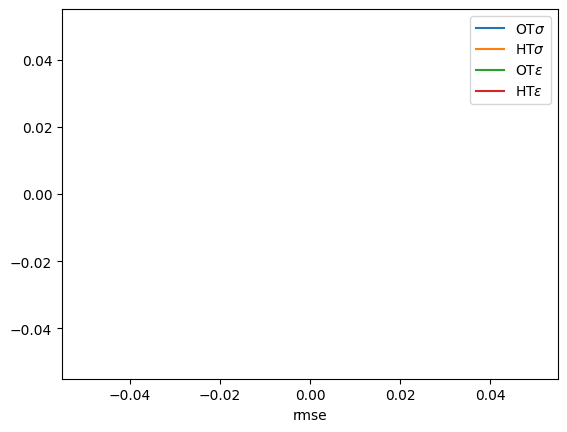

In [11]:
x = best_func["x"]
values = []
for _ in x:
    epsig = ["$\sigma$","$\epsilon$"]
    names = []
    for es in epsig:
        for at in ff.atom_types:
            names.append(at+es)
    values.append({names[i]: _[i] for i in range(len(_))})
    
    
values = pd.DataFrame(values)
values["rmse"] = best_func["fun"]

values.plot("rmse")
            
    

In [14]:
best = df[df["train"] < 35]
# best["test"] = np.sqrt(best["test"])
# best["train"] = np.sqrt(best["train"]) 
best

,test,train,args,df
8,30.918455,32.519846,"[1.6847203238692425, 0.5, 0.21902560777263522,...",ECOL KEY TOTAL E...
10,36.719282,32.075523,"[1.008431738385852, 1.3425720113214608, 0.3548...",ECOL KEY TOTAL E...
12,32.804856,26.748546,"[1.6717144119809983, 0.5, 0.307366042541767, 0...",ECOL KEY TOTAL E...
13,36.719283,32.075523,"[1.0084317083546837, 1.342572057732848, 0.3548...",ECOL KEY TOTAL E...
14,32.804861,26.748546,"[1.6717143816909292, 0.5, 0.30736628159376395,...",ECOL KEY TOTAL E...
17,32.804844,26.748546,"[1.671714431869289, 0.5, 0.30736640106874896, ...",ECOL KEY TOTAL E...
19,32.804859,26.748546,"[1.6717143514553965, 0.5, 0.3073668092657198, ...",ECOL KEY TOTAL E...
20,40.286583,26.344968,"[1.353712076575799, 1.1780333186709466, 0.0048...",ECOL KEY TOTAL E...
24,35.504452,25.102769,"[1.6812864834257315, 0.5, 0.23267502807348636,...",ECOL KEY TOTAL E...
28,35.513931,25.070408,"[1.682968256617571, 0.5, 0.21080229170948558, ...",ECOL KEY TOTAL E...


In [15]:
best.iloc[0]["df"]

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,C_ENERGY,intE,NBONDS,nb_intE,LJ,VDW_ERROR,VDW_SE,SE
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,-1527.236629,-51.714066,-38.59477,-46.510422,6.913158,7.915652,62.657545,27.077911
test471,-127.463435,test471,22.27065,-61.37597,14.54395,test471,-1527.144137,test471,-1527.242885,-61.964509,-46.83202,-54.793660,6.582310,7.961640,63.387706,51.421086
test117,-87.465907,test117,24.19257,-38.84255,8.80992,test117,-1527.145615,test117,-1527.193103,-29.798988,-30.03263,-36.176892,2.665658,6.144262,37.751953,40.677657
test96,-163.434955,test96,25.18816,-78.76038,18.10955,test96,-1527.131558,test96,-1527.246828,-72.332202,-60.65083,-70.781515,7.978865,10.130685,102.630783,2.404629
test186,-155.938399,test186,22.60152,-75.61214,22.50911,test186,-1527.145607,test186,-1527.253079,-67.438908,-53.10303,-61.789700,13.822440,8.686670,75.458238,31.913553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test46,NaN,NaN,20.70212,-45.39886,9.83768,test46,-1527.156577,test46,-1527.224431,-42.578702,-35.56118,-41.750392,3.648468,6.189212,38.306341,0.686097
test476,NaN,NaN,22.96266,-47.38883,5.61887,test476,-1527.148758,test476,-1527.230053,-51.013283,-41.76996,-47.237259,0.151571,5.467299,29.891355,14.258360
test48,NaN,NaN,22.08270,-72.69812,20.01366,test48,-1527.147549,test48,-1527.250885,-64.843945,-52.68446,-60.497964,12.200156,7.813504,61.050850,18.887547
test489,NaN,NaN,20.91705,-90.73360,32.25939,test489,-1527.152482,test489,-1527.269339,-73.327986,-58.47421,-68.857242,21.876358,10.383032,107.807345,19.987558


Text(0, 0.5, 'Train')

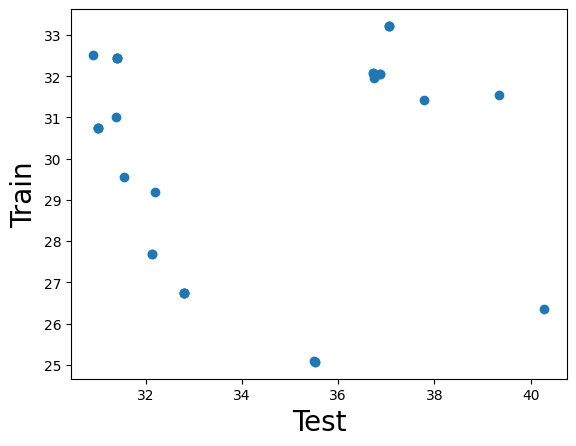

In [16]:
plt.scatter(best["test"], best["train"])
plt.xlabel("Test", fontsize=20)
plt.ylabel("Train", fontsize=20)

In [18]:
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.pyplot as plt

# # Prepare the data for the PathPatch below.
# Path = mpath.Path
# codes, verts = zip(*[
#     (Path.MOVETO, [0.018, -0.11]),
#     (Path.CURVE4, [-0.031, -0.051]),
#     (Path.CURVE4, [-0.115, 0.073]),
#     (Path.CURVE4, [-0.03, 0.073]),
#     (Path.LINETO, [-0.011, 0.039]),
#     (Path.CURVE4, [0.043, 0.121]),
#     (Path.CURVE4, [0.075, -0.005]),
#     (Path.CURVE4, [0.035, -0.027]),
#     (Path.CLOSEPOLY, [0.018, -0.11])])

# artists = [
#     mpatches.Circle((0, 0), 0.1, ec="none"),
#     mpatches.Rectangle((-0.025, -0.05), 0.05, 0.1, ec="none"),
#     mpatches.Wedge((0, 0), 0.1, 30, 270, ec="none"),
#     mpatches.RegularPolygon((0, 0), 5, radius=0.1),
#     mpatches.Ellipse((0, 0), 0.2, 0.1),
#     mpatches.Arrow(-0.05, -0.05, 0.1, 0.1, width=0.1),
#     mpatches.PathPatch(mpath.Path(verts, codes), ec="none"),
#     mpatches.FancyBboxPatch((-0.025, -0.05), 0.05, 0.1, ec="none",
#                             boxstyle=mpatches.BoxStyle("Round", pad=0.02)),
#     mlines.Line2D([-0.06, 0.0, 0.1], [0.05, -0.05, 0.05], lw=5),
# ]

# axs = plt.figure(figsize=(6, 6), layout="constrained").subplots(3, 3)
# for i, (ax, artist) in enumerate(zip(axs.flat, artists)):
#     artist.set(color=mpl.colormaps["hsv"](i / len(artists)))
#     ax.add_artist(artist)
#     ax.set(title=type(artist).__name__,
#            aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
#     ax.set_axis_off()
# plt.show()

In [19]:
# sns.choose_diverging_palette(as_cmap=True)

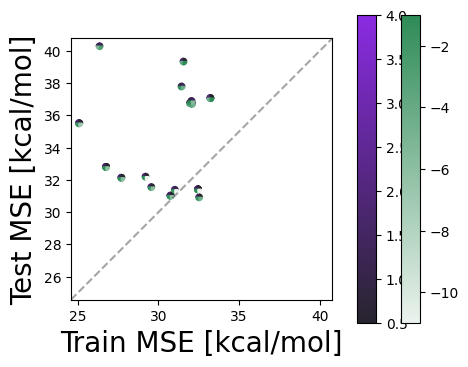

In [20]:

# cmap1 = sns.cubehelix_palette(start=.5, rot=-.99, as_cmap=True)
# cmap2 = sns.cubehelix_palette(start=.2, rot=-.99, as_cmap=True)
# cmap1 = sns.color_palette("Blues", as_cmap=True)
# cmap2 = sns.color_palette("Reds", as_cmap=True)
cmap1 = sns.color_palette("light:seagreen", as_cmap=True)
cmap2 = sns.color_palette("dark:blueviolet", as_cmap=True)


fig, ax = plt.subplots(1,3,figsize=(4.5, 4), 
                       gridspec_kw={'width_ratios': [3.5, 0.25,0.25]})

plt.subplots_adjust(wspace=0.25)

quarters = [(360,90),(90,180),(180,270),(270,360),]

def plot_circle(x,y,ax,res):
    # print(res)
    size = 0.2
    quarters = [(90,180),(0,90),(180,270),(270,0),]
    for i, (a,b) in enumerate(quarters):
        move = 0.0
        if i == 1:
            wedge = mpatches.Wedge((x, y), size, a, b)
        elif i == 0:
            wedge = mpatches.Wedge((x, y), size, a, b)
        elif i == 2:
            wedge = mpatches.Wedge((x, y+move), size, a, b)
        else:
            wedge = mpatches.Wedge((x, y+move), size, a, b)
        # wedge.set(color=mpl.colormaps["hsv"](i / 4))
        if i == 0 or i == 1:
            # print(res[i])
            cval = norm2(res[i])
            cmap = cmap2
        else:
            # print(res[i],np.log(res[i]))
            cval = norm1(np.log(res[i]))
            cmap = cmap1
        wedge.set(color=cmap(cval))
        if x < 27:
            wedge.set(alpha=1)
        ax.add_artist(wedge)
        # ax.set(aspect=1, xlim=(-.2, .2), ylim=(-.2, .2))
    return ax
    
norm1 = mpl.colors.Normalize(vmin=-11, vmax=-1)
norm2 = mpl.colors.Normalize(vmin=0.5, vmax=4)


    
# plt.scatter(best["test"], best["train"])
ax[0].set_xlabel("Train MSE [kcal/mol]", fontsize=20)
ax[0].set_ylabel("Test MSE [kcal/mol]", fontsize=20)
# plt.colorbar(cmap)
# plt.gca().set_axis_off()
minlim = min([best["test"].min(),best["train"].min()]) - .5
maxlim = max([best["test"].max(),best["train"].max()]) + .5

plt.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=cmap2),
             cax=ax[1], orientation='vertical', label='')
plt.colorbar(mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1),
             cax=ax[2], orientation='vertical', label='')

for x,y,res in zip(best["train"], best["test"], best["args"]):
    ax[0] = plot_circle(x,y,ax[0],res)

ax[0].set_xlim(minlim, maxlim)
ax[0].set_ylim(minlim, maxlim)
# ax[0].set_ylim(25, 29.5)
ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3", alpha=0.5)
# ax[0].grid()
ax[0].set_aspect(1)
plt.savefig("test.pdf",bbox_inches="tight")
plt.show()

In [21]:
from scipy.stats import bootstrap
rng = np.random.default_rng()
best_res = best.iloc[0]["df"]

In [22]:
data = (best_res["SE"],)  # samples must be in a sequence
res = bootstrap(data, np.median, confidence_level=0.95,
                random_state=rng)


In [23]:
res

BootstrapResult(confidence_interval=ConfidenceInterval(low=12.186936301651464, high=18.738976989737516), bootstrap_distribution=array([15.6757775 , 14.60496045, 17.53067135, ..., 13.88251196,
       12.83349336, 16.4341577 ]), standard_error=1.7306819993354545)

(array([293.,  53.,  29.,  12.,   8.,   1.,   1.,   0.,   2.,   1.]),
 array([3.41844341e-04, 3.49504819e+01, 6.99006219e+01, 1.04850762e+02,
        1.39800902e+02, 1.74751042e+02, 2.09701182e+02, 2.44651322e+02,
        2.79601462e+02, 3.14551602e+02, 3.49501742e+02]),
 <BarContainer object of 10 artists>)

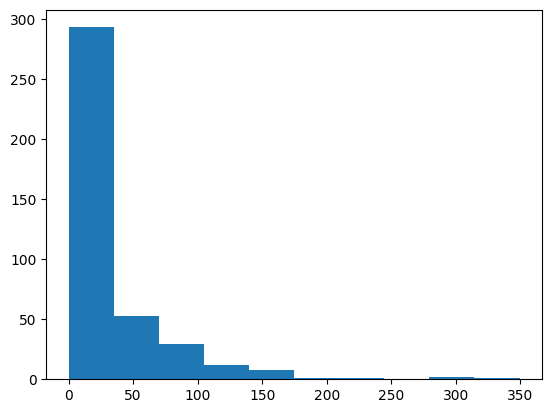

In [24]:
plt.hist(data)

In [26]:
from scipy.stats import bootstrap
rng = np.random.default_rng()
def boot_strap(best_res):
    data = (best_res["SE"],)  # samples must be in a sequence
    res = bootstrap(data, np.mean, confidence_level=0.95,
                    random_state=rng,n_resamples=99999)
    print([np.sqrt(_) for _ in [data[0].mean(),*res.confidence_interval]])
    print()
    # plt.hist(data)
    # fig, ax = plt.subplots()
    # ax.hist(res.bootstrap_distribution, bins=10)
    # ax.set_title('Bootstrap Distribution')
    # ax.set_xlabel('statistic value')
    # ax.set_ylabel('frequency')
    # plt.show()
    
for i in range(len(best)):
    print(i, best.iloc[i]["args"])
    best_res = best.iloc[i]["df"]
    boot_strap(best_res)

0 [1.68472032 0.5        0.21902561 0.01215232]
[5.560436610608762, 5.197165764776859, 5.978956136254494]

1 [1.00843174 1.34257201 0.35489484 0.00820914]
[6.059643741643233, 5.6539458500654, 6.5298851002758145]

2 [1.67171441 0.5        0.30736604 0.00204164]
[5.727552361602751, 5.344940900858729, 6.173278814150097]

3 [1.00843171 1.34257206 0.35489508 0.00820913]
[6.059643788739975, 5.651203036681179, 6.526589234025782]

4 [1.67171438 0.5        0.30736628 0.00204162]
[5.7275528008949115, 5.3451693594746015, 6.1771377616116006]

5 [1.67171443 0.5        0.3073664  0.00204159]
[5.72755135021173, 5.3442842672889395, 6.178892852253573]

6 [1.67171435 0.5        0.30736681 0.0020416 ]
[5.727552632860177, 5.341966391925678, 6.178083984839582]

7 [1.35371208 1.17803332 0.00480993 0.06015775]
[6.347171266383696, 5.941058659956587, 6.807766179295645]

8 [1.68128648e+00 5.00000000e-01 2.32675028e-01 1.00000000e-05]
[5.958561270400012, 5.57857258059201, 6.392613768546256]

9 [1.68296826e+00 5.

In [ ]:
from pydcm import Scan, DCM, dcm_fortran
import numpy as np
file_mdcm_clcl = "/home/boittier/Documents/phd/ff_energy/pydcm_/source/water_pc.dcm"
# Write dictionary for scan class
config_scan = {
    "system_label"              : "water_ccsdt_atz",
    "system_file_coord"         : "source/water.xyz",
    "system_file_type"          : "xyz",
    "system_total_charge"       : 0,
    "system_spin_multiplicity"  : 1,
    "scan_dofs"                 : [
        [0, 1],
        [0, 2],
        [1, 0, 2]
        ],
    "scan_steps"                : [
        [0.909, 0.959, 1.009],
        [0.909, 0.959, 1.009],
        np.append(np.arange(84.45,104.45,2.0), np.arange(104.45,124.45,2.0))
        ],
    "scan_qm_program"           : "Gaussian",
    "scan_qm_method"            : "CCSD(T)",
    "scan_qm_basis_set"         : "aug-cc-pVTZ",
    "scan_constrained_opt"      : False,
    "scan_parallel_tasks"       : 10,
    "scan_cpus_per_task"        : 4,
    "scan_memory_per_task"      : 1600,
    "scan_overwrite"            : False,
    "scan_time_check_tasks"     : 10 # check if the job has completed every 10s
    }

# file_config_scan = "config_scan_scn.txt"

# # Initialize scan class either by:
# scan = Scan()

# Prepare some cube file list
scan_fesp = [
    "/home/boittier/Documents/phd/ff_energy/pydcm_/data/gaussian_{:d}_{:s}_esp.cube".format(ii, config_scan["system_label"]) for ii in range(180)]
scan_fdns = [
    "/home/boittier/Documents/phd/ff_energy/pydcm_/data/gaussian_{:d}_{:s}_dens.cube".format(ii, config_scan["system_label"]) for ii in range(180)]

Nfiles = len(scan_fesp)
Nchars = int(np.max([
    len(filename) for filelist in [scan_fesp, scan_fdns] 
    for filename in filelist]))

esplist = np.empty([Nfiles, Nchars], dtype='c')
dnslist = np.empty([Nfiles, Nchars], dtype='c')

for ifle in range(1):
    esplist[ifle] = "{0:{1}s}".format(scan_fesp[ifle], Nchars)
    dnslist[ifle] = "{0:{1}s}".format(scan_fdns[ifle], Nchars)

# Load cube files, read MDCM global and local files
dcm_fortran.load_cube_files(Nfiles, Nchars, esplist.T, dnslist.T)
dcm_fortran.load_clcl_file(file_mdcm_clcl)